# Scikit-Learn Decision Trees / Logistic Regression / SVM Classifier on MNIST
> sklearn tree.DecisionTreeClassifier: https://scikit-learn.org/stable/modules/tree.html
>
> sklearn.linear_model.LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
> 
> sklearn.svm.SVC.html: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
> 
> openml mnist dataset: https://www.openml.org/d/554

In [1]:
#文档头文件
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## 构建数据集

In [2]:
#导入mnist数据集
mnist = datasets.fetch_openml('mnist_784')
data, target = mnist.data, mnist.target

In [3]:
#观察mnist数据集大小
print("mnist data shape: " , data.shape)
print("mnist target shape: " , target.shape)

mnist data shape:  (70000, 784)
mnist target shape:  (70000,)


'5'

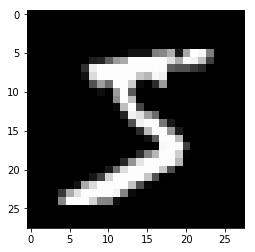

In [4]:
#观察数据样本
plt.gray()
plt.imshow(data[0].reshape(28, 28))
target[0]

In [7]:
#构建灰度直方图矩阵
def mk_gray_np(datas):
    gray_np = np.zeros([datas.shape[0], 256])
    for index, data_line in enumerate(datas):
        for i in data_line:
            gray_np[index][int(i)] += 1
    return gray_np

In [8]:
gray_np = mk_gray_np(data)
gray_np.shape

(70000, 256)

<BarContainer object of 256 artists>

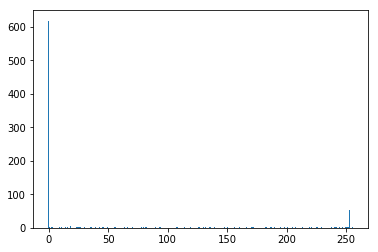

In [9]:
#绘制256色矩阵
plt.bar(range(len(gray_np[0])), gray_np[0])

In [10]:
#生成一个随机数组
indx = np.random.choice(len(target), len(target), replace=False)

#构建一定长度大小的新 data 和 target 数组
def mk_dataset(size, data, target):
    train_img = [data[i] for i in indx[:size]]
    train_img = np.array(train_img)
    test_img = [target[i] for i in indx[:size]]
    test_img = np.array(test_img)
    
    return train_img, test_img

#### 像素特征

In [11]:
#60000个训练集，10000个测试集
sixty_x, sixty_y = mk_dataset(60000, data, target)
sixty_x.shape, sixty_y.shape

((60000, 784), (60000,))

In [12]:
test_img = [data[i] for i in indx[-10000:]]
test_img_np = np.array(test_img)
test_target = [target[i] for i in indx[-10000:]]
test_target_np = np.array(test_target)
test_img_np.shape, test_target_np.shape

((10000, 784), (10000,))

#### 256色灰度特征

In [13]:
#60000个训练集，10000个测试集
sixty_gray_x, sixty_gray_y = mk_dataset(60000, gray_np, target)
sixty_gray_x.shape, sixty_gray_y.shape

((60000, 256), (60000,))

In [14]:
test_img_gray = [gray_np[i] for i in indx[-10000:]]
test_img_gray_np = np.array(test_img_gray)
test_target_gray = [target[i] for i in indx[-10000:]]
test_target_gray_np = np.array(test_target_gray)
test_img_gray_np.shape, test_target_gray_np.shape

((10000, 256), (10000,))

## 定义模型

### DecisionTreeClassifier Model

In [15]:
#定义DecisionTreeClassifier的包含函数，方便操作
def skl_dt(train_data, train_target, test_data, test_target):
    clf = DecisionTreeClassifier()
    clf.fit(train_data, train_target)
    y_pred = clf.predict(test_data)
    print(classification_report(test_target, y_pred))

### LogisticRegression Model

In [16]:
#定义LogisticRegression的包含函数，方便操作
def skl_lr(train_data, train_target, test_data, test_target):
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(train_data, train_target)
    y_pred = clf.predict(test_data)
    print(classification_report(test_target, y_pred))

### SVM Model

In [ ]:
#定义DecisionTreeClassifier的包含函数，方便操作
def skl_svm(train_data, train_target, test_data, test_target):
    clf = SVC(kernal="rbf")
    clf.fit(train_data, train_target)
    y_pred = clf.predict(test_data)
    print(classification_report(test_target, y_pred))

## 测试

### DecisionTreeClassifier Model

#### 1. 使用图片像素作为特征

In [18]:
skl_dt(sixty_x, sixty_y, test_img_np, test_target_np)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       919
           1       0.95      0.94      0.94      1129
           2       0.86      0.86      0.86      1010
           3       0.82      0.86      0.84       995
           4       0.88      0.88      0.88      1005
           5       0.82      0.81      0.82       913
           6       0.91      0.89      0.90      1009
           7       0.89      0.91      0.90      1029
           8       0.82      0.80      0.81       981
           9       0.85      0.84      0.84      1010

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### 2. 256色灰度特征

In [20]:
skl_dt(sixty_gray_x, sixty_gray_y, test_img_gray_np, test_target_gray_np)

              precision    recall  f1-score   support

           0       0.25      0.26      0.25       919
           1       0.89      0.87      0.88      1129
           2       0.14      0.14      0.14      1010
           3       0.13      0.13      0.13       995
           4       0.17      0.16      0.17      1005
           5       0.13      0.13      0.13       913
           6       0.14      0.13      0.14      1009
           7       0.28      0.30      0.29      1029
           8       0.18      0.17      0.17       981
           9       0.15      0.14      0.15      1010

   micro avg       0.25      0.25      0.25     10000
   macro avg       0.25      0.24      0.24     10000
weighted avg       0.25      0.25      0.25     10000



### LogisticRegression Model

#### 1. 使用图片像素作为特征

In [21]:
skl_lr(sixty_x, sixty_y, test_img_np, test_target_np)

C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       919
           1       0.95      0.97      0.96      1129
           2       0.90      0.89      0.89      1010
           3       0.89      0.89      0.89       995
           4       0.92      0.92      0.92      1005
           5       0.89      0.85      0.87       913
           6       0.95      0.96      0.95      1009
           7       0.93      0.92      0.93      1029
           8       0.86      0.85      0.86       981
           9       0.88      0.88      0.88      1010

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### 2. 256色灰度特征

In [22]:
skl_lr(sixty_gray_x, sixty_gray_y, test_img_gray_np, test_target_gray_np)

C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

              precision    recall  f1-score   support

           0       0.31      0.52      0.39       919
           1       0.78      0.95      0.85      1129
           2       0.20      0.06      0.10      1010
           3       0.20      0.20      0.20       995
           4       0.25      0.18      0.21      1005
           5       0.19      0.15      0.17       913
           6       0.17      0.11      0.14      1009
           7       0.34      0.40      0.37      1029
           8       0.30      0.36      0.33       981
           9       0.20      0.25      0.23      1010

   micro avg       0.33      0.33      0.33     10000
   macro avg       0.29      0.32      0.30     10000
weighted avg       0.30      0.33      0.31     10000



C:\Users\51457\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### SVM Model

#### 1. 使用图片像素作为特征

In [ ]:
skl_svm(sixty_x, sixty_y, test_img_np, test_target_np)

####  2. 256色灰度特征

In [ ]:
skl_svm(sixty_gray_x, sixty_gray_y, test_img_gray_np, test_target_gray_np)